# Deterministic Terms in Time Series Models

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc("figure", figsize=(16, 9))
plt.rc("font", size=16)

## Basic Use

Basic configurations can be directly constructed through `DeterministicProcess`. These can include a constant, a time trend of any order, and either a seasonal or a Fourier component.

The process requires an index, which is the index of the full-sample (or in-sample).

First, we initialize a deterministic process with a constant, a linear time trend, and a 5-period seasonal term. The `in_sample` method returns the full set of values that match the index.

In [2]:
from statsmodels.tsa.deterministic import DeterministicProcess

index = pd.RangeIndex(0, 100)
det_proc = DeterministicProcess(index, constant=True, order=1, seasonal=True, period=5)
det_proc.in_sample()

,const,trend,"s(2,5)","s(3,5)","s(4,5)","s(5,5)"
0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,2.0,1.0,0.0,0.0,0.0
2,1.0,3.0,0.0,1.0,0.0,0.0
3,1.0,4.0,0.0,0.0,1.0,0.0
4,1.0,5.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
95,1.0,96.0,0.0,0.0,0.0,0.0
96,1.0,97.0,1.0,0.0,0.0,0.0
97,1.0,98.0,0.0,1.0,0.0,0.0
98,1.0,99.0,0.0,0.0,1.0,0.0


The `out_of_sample` returns the next `steps` values after the end of the in-sample.

In [3]:
det_proc.out_of_sample(15)

,const,trend,"s(2,5)","s(3,5)","s(4,5)","s(5,5)"
100,1.0,101.0,0.0,0.0,0.0,0.0
101,1.0,102.0,1.0,0.0,0.0,0.0
102,1.0,103.0,0.0,1.0,0.0,0.0
103,1.0,104.0,0.0,0.0,1.0,0.0
104,1.0,105.0,0.0,0.0,0.0,1.0
105,1.0,106.0,0.0,0.0,0.0,0.0
106,1.0,107.0,1.0,0.0,0.0,0.0
107,1.0,108.0,0.0,1.0,0.0,0.0
108,1.0,109.0,0.0,0.0,1.0,0.0
109,1.0,110.0,0.0,0.0,0.0,1.0


`range(start, stop)` can also be used to produce the deterministic terms over any range including in- and out-of-sample.

### Notes

* When the index is a pandas `DatetimeIndex` or a `PeriodIndex`, then `start` and `stop` can be date-like (strings, e.g., "2020-06-01", or Timestamp) or integers.
* `stop` is always included in the range. While this is not very Pythonic, it is needed since both statsmodels and Pandas include `stop` when working with date-like slices.

In [4]:
det_proc.range(190, 210)

,const,trend,"s(2,5)","s(3,5)","s(4,5)","s(5,5)"
190,1.0,191.0,0.0,0.0,0.0,0.0
191,1.0,192.0,1.0,0.0,0.0,0.0
192,1.0,193.0,0.0,1.0,0.0,0.0
193,1.0,194.0,0.0,0.0,1.0,0.0
194,1.0,195.0,0.0,0.0,0.0,1.0
195,1.0,196.0,0.0,0.0,0.0,0.0
196,1.0,197.0,1.0,0.0,0.0,0.0
197,1.0,198.0,0.0,1.0,0.0,0.0
198,1.0,199.0,0.0,0.0,1.0,0.0
199,1.0,200.0,0.0,0.0,0.0,1.0


## Using a Date-like Index

Next, we show the same steps using a `PeriodIndex`.

In [5]:
index = pd.period_range("2020-03-01", freq="M", periods=60)
det_proc = DeterministicProcess(index, constant=True, fourier=2)
det_proc.in_sample().head(12)

,const,"sin(1,12)","cos(1,12)","sin(2,12)","cos(2,12)"
2020-03,1.0,0.000000e+00,1.000000e+00,0.000000e+00,1.0
2020-04,1.0,5.000000e-01,8.660254e-01,8.660254e-01,0.5
2020-05,1.0,8.660254e-01,5.000000e-01,8.660254e-01,-0.5
2020-06,1.0,1.000000e+00,6.123234e-17,1.224647e-16,-1.0
2020-07,1.0,8.660254e-01,-5.000000e-01,-8.660254e-01,-0.5
2020-08,1.0,5.000000e-01,-8.660254e-01,-8.660254e-01,0.5
2020-09,1.0,1.224647e-16,-1.000000e+00,-2.449294e-16,1.0
2020-10,1.0,-5.000000e-01,-8.660254e-01,8.660254e-01,0.5
2020-11,1.0,-8.660254e-01,-5.000000e-01,8.660254e-01,-0.5
2020-12,1.0,-1.000000e+00,-1.836970e-16,3.673940e-16,-1.0


In [6]:
det_proc.out_of_sample(12)

,const,"sin(1,12)","cos(1,12)","sin(2,12)","cos(2,12)"
2025-03,1.0,-1.224647e-15,1.000000e+00,-2.449294e-15,1.0
2025-04,1.0,5.000000e-01,8.660254e-01,8.660254e-01,0.5
2025-05,1.0,8.660254e-01,5.000000e-01,8.660254e-01,-0.5
2025-06,1.0,1.000000e+00,-4.904777e-16,-9.809554e-16,-1.0
2025-07,1.0,8.660254e-01,-5.000000e-01,-8.660254e-01,-0.5
2025-08,1.0,5.000000e-01,-8.660254e-01,-8.660254e-01,0.5
2025-09,1.0,4.899825e-15,-1.000000e+00,-9.799650e-15,1.0
2025-10,1.0,-5.000000e-01,-8.660254e-01,8.660254e-01,0.5
2025-11,1.0,-8.660254e-01,-5.000000e-01,8.660254e-01,-0.5
2025-12,1.0,-1.000000e+00,-3.184701e-15,6.369401e-15,-1.0


`range` accepts date-like arguments, which are usually given as strings.

In [7]:
det_proc.range("2025-01", "2026-01")

,const,"sin(1,12)","cos(1,12)","sin(2,12)","cos(2,12)"
2025-01,1.0,-8.660254e-01,5.000000e-01,-8.660254e-01,-0.5
2025-02,1.0,-5.000000e-01,8.660254e-01,-8.660254e-01,0.5
2025-03,1.0,-1.224647e-15,1.000000e+00,-2.449294e-15,1.0
2025-04,1.0,5.000000e-01,8.660254e-01,8.660254e-01,0.5
2025-05,1.0,8.660254e-01,5.000000e-01,8.660254e-01,-0.5
2025-06,1.0,1.000000e+00,-4.904777e-16,-9.809554e-16,-1.0
2025-07,1.0,8.660254e-01,-5.000000e-01,-8.660254e-01,-0.5
2025-08,1.0,5.000000e-01,-8.660254e-01,-8.660254e-01,0.5
2025-09,1.0,4.899825e-15,-1.000000e+00,-9.799650e-15,1.0
2025-10,1.0,-5.000000e-01,-8.660254e-01,8.660254e-01,0.5


This is equivalent to using the integer values 58 and 70.

In [8]:
det_proc.range(58, 70)

,const,"sin(1,12)","cos(1,12)","sin(2,12)","cos(2,12)"
2025-01,1.0,-8.660254e-01,5.000000e-01,-8.660254e-01,-0.5
2025-02,1.0,-5.000000e-01,8.660254e-01,-8.660254e-01,0.5
2025-03,1.0,-1.224647e-15,1.000000e+00,-2.449294e-15,1.0
2025-04,1.0,5.000000e-01,8.660254e-01,8.660254e-01,0.5
2025-05,1.0,8.660254e-01,5.000000e-01,8.660254e-01,-0.5
2025-06,1.0,1.000000e+00,-4.904777e-16,-9.809554e-16,-1.0
2025-07,1.0,8.660254e-01,-5.000000e-01,-8.660254e-01,-0.5
2025-08,1.0,5.000000e-01,-8.660254e-01,-8.660254e-01,0.5
2025-09,1.0,4.899825e-15,-1.000000e+00,-9.799650e-15,1.0
2025-10,1.0,-5.000000e-01,-8.660254e-01,8.660254e-01,0.5


## Advanced Construction

Deterministic processes with features not supported directly through the constructor can be created using `additional_terms` which accepts a list of `DetermisticTerm`. Here we create a deterministic process with two seasonal components: day-of-week with a 5 day period and an annual captured through a Fourier component with a period of 365.25 days.

In [9]:
from statsmodels.tsa.deterministic import Fourier, Seasonality, TimeTrend

index = pd.period_range("2020-03-01", freq="D", periods=2 * 365)
tt = TimeTrend(constant=True)
four = Fourier(period=365.25, order=2)
seas = Seasonality(period=7)
det_proc = DeterministicProcess(index, additional_terms=[tt, seas, four])
det_proc.in_sample().head(28)

,const,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,365.25)","cos(1,365.25)","sin(2,365.25)","cos(2,365.25)"
2020-03-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000
2020-03-02,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.017202,0.999852,0.034398,0.999408
2020-03-03,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.034398,0.999408,0.068755,0.997634
2020-03-04,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.051584,0.998669,0.103031,0.994678
2020-03-05,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.068755,0.997634,0.137185,0.990545
2020-03-06,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.085906,0.996303,0.171177,0.985240
2020-03-07,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.103031,0.994678,0.204966,0.978769
2020-03-08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120126,0.992759,0.238513,0.971139
2020-03-09,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.137185,0.990545,0.271777,0.962360
2020-03-10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.154204,0.988039,0.304719,0.952442


## Custom Deterministic Terms

The `DetermisticTerm` Abstract Base Class is designed to be subclassed to help users write custom deterministic terms.  We next show two examples. The first is a broken time trend that allows a break after a fixed number of periods. The second is a "trick" deterministic term that allows exogenous data, which is not really a deterministic process, to be treated as if was deterministic.  This lets use simplify gathering the terms needed for forecasting.

These are intended to demonstrate the construction of custom terms. They can definitely be improved in terms of input validation.

In [10]:
from statsmodels.tsa.deterministic import DeterministicTerm


class BrokenTimeTrend(DeterministicTerm):
    def __init__(self, break_period: int):
        self._break_period = break_period

    def __str__(self):
        return "Broken Time Trend"

    def _eq_attr(self):
        return (self._break_period,)

    def in_sample(self, index: pd.Index):
        nobs = index.shape[0]
        terms = np.zeros((nobs, 2))
        terms[self._break_period :, 0] = 1
        terms[self._break_period :, 1] = np.arange(self._break_period + 1, nobs + 1)
        return pd.DataFrame(terms, columns=["const_break", "trend_break"], index=index)

    def out_of_sample(
        self, steps: int, index: pd.Index, forecast_index: pd.Index = None
    ):
        # Always call extend index first
        fcast_index = self._extend_index(index, steps, forecast_index)
        nobs = index.shape[0]
        terms = np.zeros((steps, 2))
        # Assume break period is in-sample
        terms[:, 0] = 1
        terms[:, 1] = np.arange(nobs + 1, nobs + steps + 1)
        return pd.DataFrame(
            terms, columns=["const_break", "trend_break"], index=fcast_index
        )

In [11]:
btt = BrokenTimeTrend(60)
tt = TimeTrend(constant=True, order=1)
index = pd.RangeIndex(100)
det_proc = DeterministicProcess(index, additional_terms=[tt, btt])
det_proc.range(55, 65)

,const,trend,const_break,trend_break
55,1.0,56.0,0.0,0.0
56,1.0,57.0,0.0,0.0
57,1.0,58.0,0.0,0.0
58,1.0,59.0,0.0,0.0
59,1.0,60.0,0.0,0.0
60,1.0,61.0,1.0,61.0
61,1.0,62.0,1.0,62.0
62,1.0,63.0,1.0,63.0
63,1.0,64.0,1.0,64.0
64,1.0,65.0,1.0,65.0


Next, we write a simple "wrapper" for some actual exogenous data that simplifies constructing out-of-sample exogenous arrays for forecasting.

In [12]:
class ExogenousProcess(DeterministicTerm):
    def __init__(self, data):
        self._data = data

    def __str__(self):
        return "Custom Exog Process"

    def _eq_attr(self):
        return (id(self._data),)

    def in_sample(self, index: pd.Index):
        return self._data.loc[index]

    def out_of_sample(
        self, steps: int, index: pd.Index, forecast_index: pd.Index = None
    ):
        forecast_index = self._extend_index(index, steps, forecast_index)
        return self._data.loc[forecast_index]

In [13]:
import numpy as np

gen = np.random.default_rng(98765432101234567890)
exog = pd.DataFrame(gen.integers(100, size=(300, 2)), columns=["exog1", "exog2"])
exog.head()

,exog1,exog2
0,6,99
1,64,28
2,15,81
3,54,8
4,12,8


In [14]:
ep = ExogenousProcess(exog)
tt = TimeTrend(constant=True, order=1)
# The in-sample index
idx = exog.index[:200]
det_proc = DeterministicProcess(idx, additional_terms=[tt, ep])

In [15]:
det_proc.in_sample().head()

,const,trend,exog1,exog2
0,1.0,1.0,6,99
1,1.0,2.0,64,28
2,1.0,3.0,15,81
3,1.0,4.0,54,8
4,1.0,5.0,12,8


In [16]:
det_proc.out_of_sample(10)

,const,trend,exog1,exog2
200,1.0,201.0,56,88
201,1.0,202.0,48,84
202,1.0,203.0,44,5
203,1.0,204.0,65,63
204,1.0,205.0,63,39
205,1.0,206.0,89,39
206,1.0,207.0,41,54
207,1.0,208.0,71,5
208,1.0,209.0,89,6
209,1.0,210.0,58,63


## Model Support

The only model that directly supports `DeterministicProcess` is `AutoReg`. A custom term can be set using the `deterministic` keyword argument. 

**Note**: Using a custom term requires that `trend="n"` and `seasonal=False` so that all deterministic components must come from the custom deterministic term.

### Simulate Some Data

Here we simulate some data that has an weekly seasonality captured by a Fourier series.

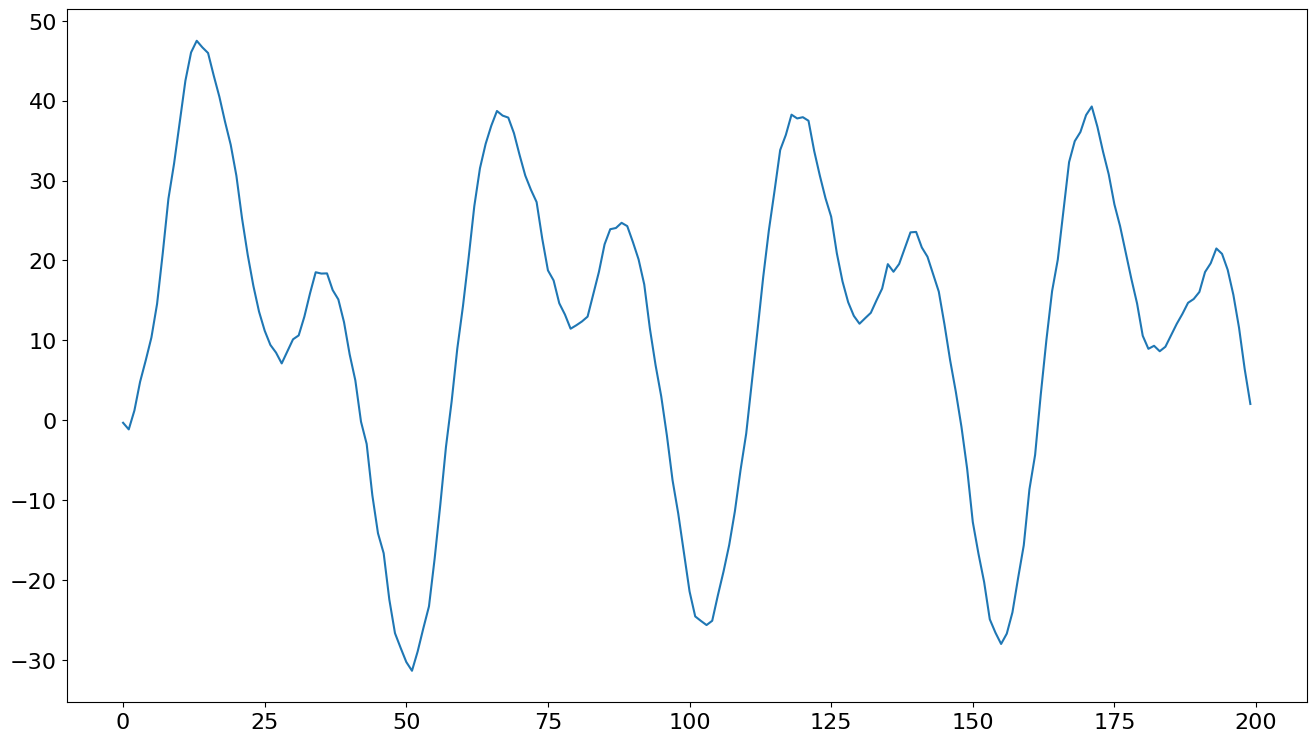

In [17]:
gen = np.random.default_rng(98765432101234567890)
idx = pd.RangeIndex(200)
det_proc = DeterministicProcess(idx, constant=True, period=52, fourier=2)
det_terms = det_proc.in_sample().to_numpy()
params = np.array([1.0, 3, -1, 4, -2])
exog = det_terms @ params
y = np.empty(200)
y[0] = det_terms[0] @ params + gen.standard_normal()
for i in range(1, 200):
    y[i] = 0.9 * y[i - 1] + det_terms[i] @ params + gen.standard_normal()
y = pd.Series(y, index=idx)
ax = y.plot()

The model is then fit using the `deterministic` keyword argument. `seasonal` defaults to False but `trend` defaults to `"c"` so this needs to be changed.

In [18]:
from statsmodels.tsa.api import AutoReg

mod = AutoReg(y, 1, trend="n", deterministic=det_proc)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  200
Model:                     AutoReg(1)   Log Likelihood                -270.964
Method:               Conditional MLE   S.D. of innovations              0.944
Date:                Fri, 30 Jun 2023   AIC                            555.927
Time:                        12:01:13   BIC                            578.980
Sample:                             1   HQIC                           565.258
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8436      0.172      4.916      0.000       0.507       1.180
sin(1,52)      2.9738      0.160     18.587      0.000       2.660       3.287
cos(1,52)     -0.6771      0.284     -2.380      0.0

We can use the `plot_predict` to show the predicted values and their prediction interval. The out-of-sample deterministic values are automatically produced by the deterministic process passed to `AutoReg`.

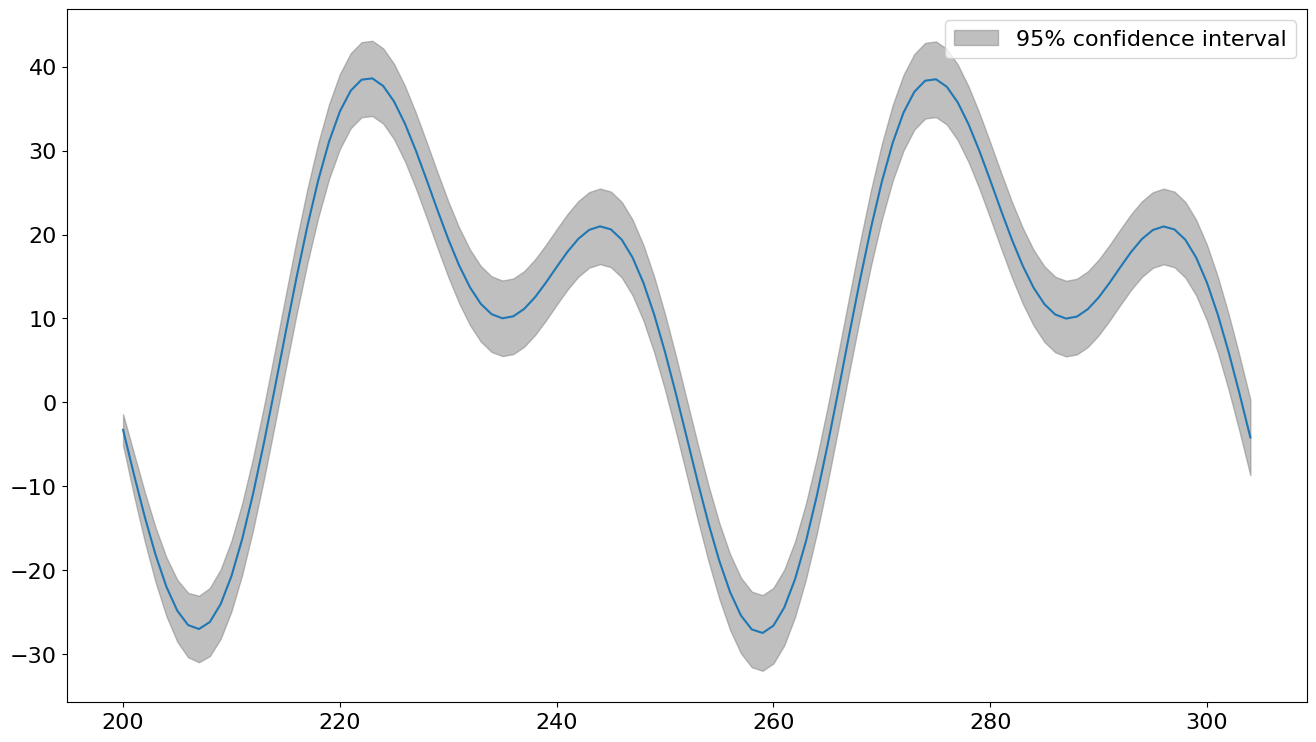

In [19]:
fig = res.plot_predict(200, 200 + 2 * 52, True)

In [20]:
auto_reg_forecast = res.predict(200, 211)
auto_reg_forecast

200    -3.253482
201    -8.555660
202   -13.607557
203   -18.152622
204   -21.950370
205   -24.790116
206   -26.503171
207   -26.972781
208   -26.141244
209   -24.013773
210   -20.658891
211   -16.205310
dtype: float64

## Using with other models

Other models do not support `DeterministicProcess` directly.  We can instead manually pass any deterministic terms as `exog` to model that support exogenous values.

Note that `SARIMAX` with exogenous variables is OLS with SARIMA errors so that the model is 

$$
\begin{align*}
\nu_t & = y_t - x_t \beta  \\
(1-\phi(L))\nu_t & = (1+\theta(L))\epsilon_t.
\end{align*}
$$

The parameters on deterministic terms are not directly comparable to `AutoReg` which evolves according to the equation

$$
(1-\phi(L)) y_t = x_t \beta + \epsilon_t.
$$

When $x_t$ contains only deterministic terms, these two representation are equivalent (assuming $\theta(L)=0$ so that there is no MA).


In [21]:
from statsmodels.tsa.api import SARIMAX

det_proc = DeterministicProcess(idx, period=52, fourier=2)
det_terms = det_proc.in_sample()

mod = SARIMAX(y, order=(1, 0, 0), trend="c", exog=det_terms)
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -293.381
Date:                Fri, 30 Jun 2023   AIC                            600.763
Time:                        12:01:13   BIC                            623.851
Sample:                             0   HQIC                           610.106
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0797      0.140      0.567      0.570      -0.196       0.355
sin(1,52)      9.1916      0.876     10.492      0.000       7.475      10.909
cos(1,52)    -17.4348      0.891    -19.576      0.0

The forecasts are similar but differ since the parameters of the `SARIMAX` are estimated using MLE while `AutoReg` uses OLS.

In [22]:
sarimax_forecast = res.forecast(12, exog=det_proc.out_of_sample(12))
df = pd.concat([auto_reg_forecast, sarimax_forecast], axis=1)
df.columns = columns = ["AutoReg", "SARIMAX"]
df

,AutoReg,SARIMAX
200,-3.253482,-2.956562
201,-8.555660,-7.985588
202,-13.607557,-12.794072
203,-18.152622,-17.130962
204,-21.950370,-20.760472
205,-24.790116,-23.475510
206,-26.503171,-25.109628
207,-26.972781,-25.546788
208,-26.141244,-24.728384
209,-24.013773,-22.657093
